<a href="https://colab.research.google.com/github/vidakpop/Visualization-and-Regression/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm



In [ ]:
# Loading the dataset 
url='https://raw.githubusercontent.com/vidakpop/Visualization-and-Regression/main/train%20(titanic).csv'
df=pd.read_csv(url,encoding='unicode_escape')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.corr()


<ipython-input-3-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-4-bd263b57df3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


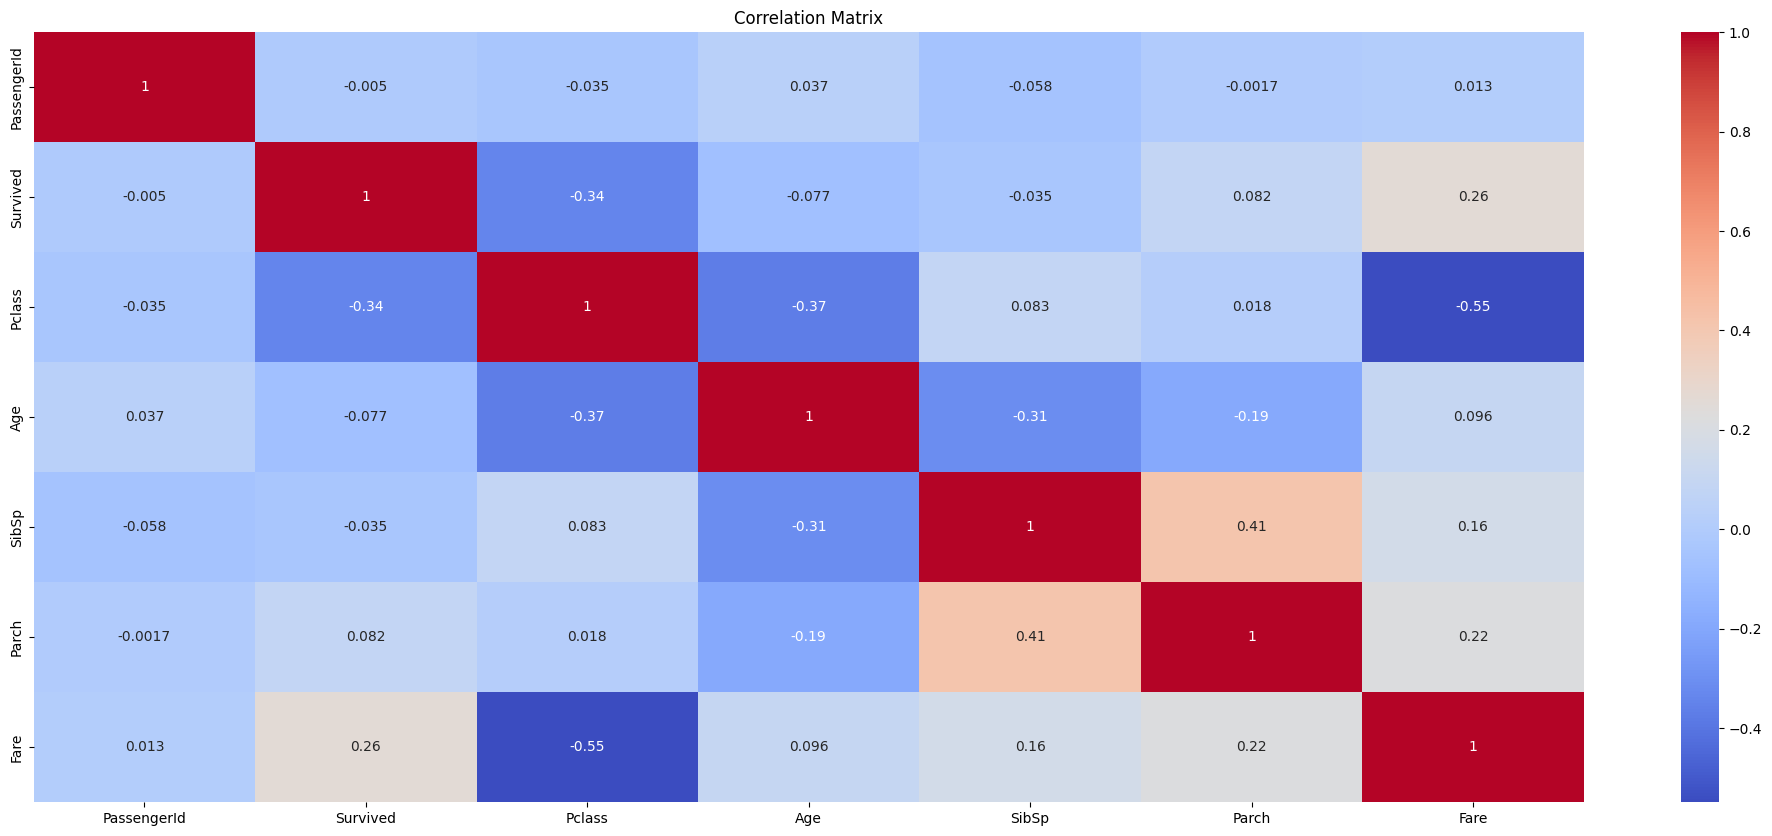

In [ ]:
#Correlation Matrix
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()


<ipython-input-9-01832763be9f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of the decision tree classifier: 75.52%


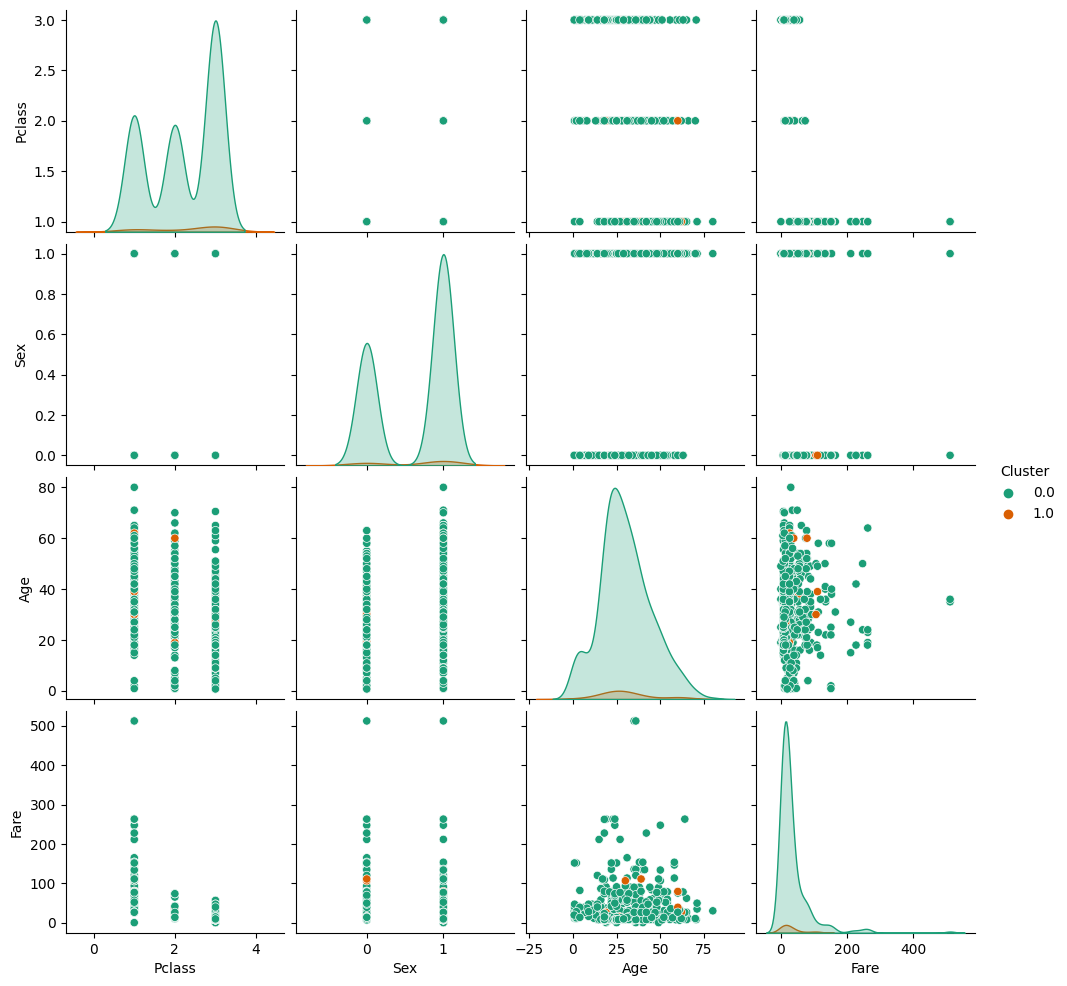

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import pandas as pd


# Define the feature columns and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Survived'

# Preprocess the data
df = df.dropna(subset=features+[target])
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Split the data into train and test sets
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train[features], train[target])
pred = clf.predict(test[features])
accuracy = accuracy_score(test[target], pred)
print("Accuracy of the decision tree classifier: {:.2f}%".format(accuracy * 100))

# Apply KMeans clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(df[features])
df_cluster = pd.concat([df[features], pd.Series(cluster_labels, name='Cluster')], axis=1)

# Visualize the clusters
sns.pairplot(df_cluster, hue='Cluster', palette='Dark2')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Loading the dataset
url='https://raw.githubusercontent.com/vidakpop/Visualization-and-Regression/main/train%20(titanic).csv'
df=pd.read_csv(url,encoding='unicode_escape')

# Selecting relevant features for the regression
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

# Encoding the 'Sex' feature
X = pd.get_dummies(X, columns=['Sex'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputing missing values with median value of the respective column
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Creating a logistic regression model and fitting it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predicting the target variable for the testing data
y_pred = lr.predict(X_test)

# Calculating the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model: {:.2f}%".format(accuracy*100))


Accuracy of the logistic regression model: 81.01%


Dead passengers:  549
Survived passengers:  342


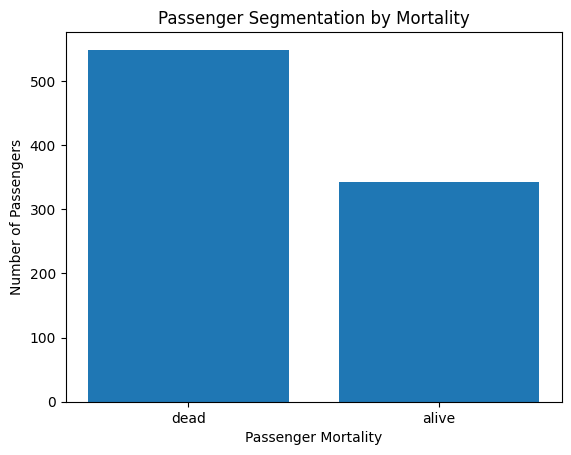

In [ ]:
# Segment the dataset based on survived
dead= df[df['Survived'] == 0]
alive = df[df['Survived'] == 1]


# Print the number of passengers in each class
print("Dead passengers: ", len(dead))
print("Survived passengers: ", len(alive))

import matplotlib.pyplot as plt

# Set the data for the bar chart
data = [len(dead), len(alive)]
mortality = ['dead', 'alive']

# Create the bar chart
plt.bar(mortality, data)

# Add labels and title
plt.xlabel('Passenger Mortality')
plt.ylabel('Number of Passengers')
plt.title('Passenger Segmentation by Mortality')

# Show the plot
plt.show()
